## Проверка гипотез в интернет магазине

**Цель анализа:** приоритизация и проверка гипотез о работе интернет магазина для увеличения выручки.

**Описание:** <br>
Совместно с отделом маркетинга был сформирован перечень гипотез, оцененных по ключевым критериям, направленных на рост выручки интернет-магазина. <br>
Необходимо приоритизировать гипотезы, выполнить A/B тесты и проанализировать результаты.
<br><br>
Разделим задачу на две части:
1) Приоритизация гипотез
2) Анализ результата A/B-теста

In [1]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
# установка настроек pandas
pd.options.display.max_colwidth = 100 # максимально кол-во отображаемых символов в ячейке

## Часть 1. Приоритизация гипотез.

<a name='Описание-данных'>**Описание данных** <br> </a>
Данные с гипотезами и их оценкой предоставленны в файле "hypothesis.csv" и содержит:
    
    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
    

### Открытие файла и вывод общей информации

In [3]:
# адреса локальных файлов
files = ['local.csv']

# URLs на файлы
urls = [r'https://code.s3.yandex.net/***.csv']

try: # по возмажности локальный файл
    hypothesis = pd.read_csv(files[0])
except: # иначе URL
     hypothesis = pd.read_csv(urls[0])
    
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Итого 9 гипотез, без пропусков и дубликатов. <br>
Переведем название полей в нижний регистр

In [5]:
# переводим названия полей в нижний регистр
hypothesis.columns = hypothesis.columns.str.lower()

hypothesis # проверка

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Определение приоритета гипотез

Рассчитаем приоритет по методу ICE и RICE

In [6]:
# рассчитываем приоритет по методу ICE
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']
                    ) / hypothesis['efforts']).round(2)

# рассчитываем приоритет по методу RICE
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] 
                               * hypothesis['confidence']
                    ) / hypothesis['efforts']).round(2)

# добавим ранги согласно ранжированию
# высшему приоритету - высший ранг
hypothesis['rank_ice'] = hypothesis['ICE'].rank(ascending=True)
hypothesis['rank_rice'] = hypothesis['RICE'].rank(ascending=True)


# вывод результата по ICE
display(hypothesis[['hypothesis', 'ICE', 'rank_ice']
                  ].sort_values('ICE', ascending=False))
# вывод результата по RICE
display(hypothesis[['hypothesis', 'RICE', 'rank_rice']
                  ].sort_values('RICE', ascending=False))

,hypothesis,ICE,rank_ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,9.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,8.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,7.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00,6.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00,5.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,3.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,2.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,1.0


,hypothesis,RICE,rank_rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,9.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0,8.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,6.5
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0,6.5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,5.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,4.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.5
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,2.5
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.0


Из за разного масштаба значений не удобно определить топ гипотез по двум методам оценки. <br>
Добавим поле с суммарным значением рангов. 

In [7]:
# добавляем суммарный ранг
hypothesis['sum_rank'] = hypothesis['rank_rice'] + hypothesis['rank_ice']

hypothesis[['hypothesis', 'ICE', 'RICE', 'rank_ice', 'rank_rice', 'sum_rank']
                          ].sort_values('sum_rank', ascending=False)

,hypothesis,ICE,RICE,rank_ice,rank_rice,sum_rank
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0,7.0,9.0,16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0,8.0,6.5,14.5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2,9.0,5.0,14.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00,56.0,5.0,8.0,13.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00,40.0,6.0,6.5,12.5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0,4.0,2.5,6.5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0,2.0,4.0,6.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0,3.0,2.5,5.5
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0,1.0,1.0,2.0


Метод RICE учитывает охват аудитории, что может влиять на расстановку приоритетов по сравнению с методом ICE. <br><br>
Выбор приоритетного метода приотизации гипотез зависит от контекста гипотезы, бизнес задач и плана развития бизнеса/продукта. <br>
В среднем метод RICE дает более точные результаты при условии, что имеются корректные данные. <br>


**Топ 3 гипотезы по сумме рангов:**
1) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3) 8 - Запустить акцию, дающую скидку на товар в день рождения


**Топ 3 гипотезы по методу ICE:**
1) 8 - Запустить акцию, дающую скидку на товар в день рождения
2) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

**Топ 3 гипотезы по методу RICE:**
1) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2) 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

**Самый низкий приоритет у гипотез по двум методам:**
* 1 - Запустить собственную службу доставки, что сократит срок доставки заказов
* 3 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* 4 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
* 5 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов

**Вывод по разделу:** <br><br>
При проведении проверки гипотез сделать акцент на гипотезы:
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* 8 - Запустить акцию, дающую скидку на товар в день рождения
<br><br>
По необходимости можно исключить гипотезы:
* 1 - Запустить собственную службу доставки, что сократит срок доставки заказов
* 3 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* 4 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
* 5 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов

## Часть 2. Анализ A/B-теста

Был произведен A/B-тест. Результаты тестирования предоставленны в файлах 'orders.csv' и 'visitors.csv'. <br><br>
<a name='Описание-данных-2'>**Описание данных** <br> </a>
Файл 'orders.csv' содержит:

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.
    
<br><br>
Файл 'visitors.csv' содержит:

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Открытие файлов и вывод общей информации

In [8]:
# адреса локальных файлов
files = ['orders.csv', 'visitors.csv']

# URLs на файлы
urls = [r'https://code.s3.yandex.net/datasets/orders.csv', 
        r'https://code.s3.yandex.net/datasets/visitors.csv']

try: # по возмажности локальный файл
    orders, visitors = (pd.read_csv(file) for file in files)
except: # иначе URL
    orders, visitors = (pd.read_csv(file) for file in urls)
    
display(orders.head(5), orders.tail(5))
display(visitors.head(5), visitors.tail(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [9]:
orders.info() # общие данные по orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.info() # общие данные по visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков нет. <br>
Необходимо переименовать поля 'transactionId' и 'visitorId' в orders согласно общепринятому стандарту. <br>
Необходимо перевести поля 'date' в формат datetime в обоих DataFrame.


### Предобработка и анализ полученных данных

In [11]:
# переименование полей
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

orders.sample() # проверка

,transaction_id,visitor_id,date,revenue,group
807,2740953457,3102053760,2019-08-05,990,A


In [12]:
# переводим поле date в формат даты
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# проверка
display(orders.sample(3))
display(visitors.sample(3))

,transaction_id,visitor_id,date,revenue,group
124,2923696601,749770631,2019-08-17,4480,A
27,1630050528,237748145,2019-08-15,7620,B
383,3533599275,4018812886,2019-08-03,1490,B


,date,group,visitors
27,2019-08-28,A,594
51,2019-08-21,B,656
38,2019-08-08,B,654


Продолжим анализ исходных данных методом describe

In [13]:
# анализ полученных данных orders
orders.describe()

,transaction_id,visitor_id,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [14]:
# анализ полученных данных visitors
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [15]:
# проверка на полные дубликаты
print(f'Дубликатов в orders: {orders[orders.duplicated()].shape[0]}')

Дубликатов в orders: 0


In [77]:
orders[orders.groupby('visitor_id')['group'].transform('nunique') > 1]

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,1290,B
1183,1458356232,963407295,2019-08-14,4940,A
1184,1329499668,2949041841,2019-08-14,10380,B
1189,4082620617,393266494,2019-08-14,31550,B


In [78]:
orders[orders.visitor_id==4069496402]

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
1070,1473132782,4069496402,2019-08-12,640,B


In [16]:
# проверка на полные дубликаты
print(f'Дубликатов в visitors: {visitors[visitors.duplicated()].shape[0]}')

Дубликатов в visitors: 0


Дубликатов нет. <br>
Проверим А/В группы по заказам

In [17]:
# получаем кол-во заказов и объем/среднее выручки по группам
a_b_table = orders.groupby(by='group', as_index=False).agg({
    'transaction_id':'count', 
    'visitor_id':'nunique', 
    'revenue':['sum', 'mean']}
                        )
a_b_table.columns = ['group', 'cnt_orders', 
                     'cnt_unique_visitors', 'sum_revenue', 
                     'mean_revenue']

# добавим отношение по кол-ву заказов
a_b_table['rel_cnt_orders'] = (a_b_table.cnt_orders/a_b_table.cnt_orders.sum()
                                           *100).round(2)

a_b_table

,group,cnt_orders,cnt_unique_visitors,sum_revenue,mean_revenue,rel_cnt_orders
0,A,557,503,4084803,7333.578097,46.53
1,B,640,586,5907760,9230.875000,53.47


* Данные за весь август 2019 года, пропусков в датах по двум группам нет (62 строки, по 31 строки на каждую группу).
* Дубликатов нет.
* По группам есть отличие в кол-во заказов (около 6.9%) и кол-ве уникальных пользователей.


Проверим распределение количественных значений.

#### Анализ количественных значений

##### Анализ по выручки

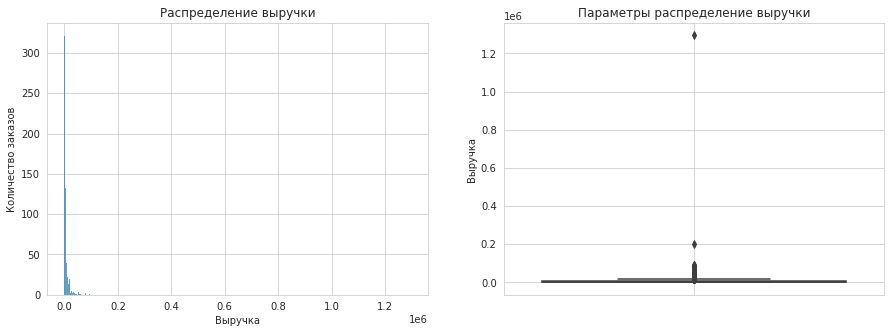

In [18]:
# графики распределения выручки
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# выведем распределение выручки
sns.histplot(data=orders, x='revenue', ax=ax[0])
# настройки графика
ax[0].set_title("Распределение выручки")
ax[0].set_ylabel("Количество заказов")
ax[0].set_xlabel("Выручка")


 # визуальный анализ параметров распределение выручки
sns.boxplot(data=orders, y='revenue',
            width=0.8, ax=ax[1])
# настройки графика
ax[1].set_title("Параметры распределение выручки")
ax[1].set_ylabel("Выручка")

# включаем сетку
plt.grid(True)

plt.show()

In [19]:
# выводим перцентили
print('90-й перцентиль: {0:.2f}'.format(np.percentile(orders['revenue'], 90)))
print('95-й перцентиль: {0:.2f}'.format(np.percentile(orders['revenue'], 95)))
print('99-й перцентиль: {0:.2f}'.format(np.percentile(orders['revenue'], 99)))

90-й перцентиль: 18168.00
95-й перцентиль: 28000.00
99-й перцентиль: 58233.20


Есть несколько аномалий.<br>
Выведем 5% аномальных заказов

In [20]:
# выводим 5% аномальных заказов
temp = orders[orders['revenue']>=np.percentile(orders['revenue'], 95)
                             ].sort_values('revenue', ascending=False)

print(f'Кол-во 5% аномальных заказов: {temp.shape[0]}')

display(temp.head(5)) # выводим первые 5 значений
display(temp.tail(5)) # и последние 5 значений

Кол-во 5% аномальных заказов: 60


,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


,transaction_id,visitor_id,date,revenue,group
73,1295850747,2947100995,2019-08-01,29499,A
960,2012277167,2999642019,2019-08-10,28750,B
137,1798931686,1211585711,2019-08-01,28490,A
723,2023295336,4009017467,2019-08-05,28350,B
1121,2023943756,1604853044,2019-08-13,28060,A


Есть 60 заказов, которые составляют 5% и имеют выручку свыше 28 т.у.е.. <br>
Особенно выделяются два заказа в группе В с выручкой в 202 т.у.е. и 1294 т.у.е. <br>
Проверим распределение выручки без учета 5% аномальных заказов. Создадим отдельный dataframe без этих заказов.

In [21]:
# создаем df без 5% значений 
orders_temp = orders.drop(
    orders[orders['revenue']>=np.percentile(orders['revenue'], 95)].index
                    )

orders_temp.shape[0]==(1197-60) # проверка что удалили 60 значений

True

Выведем графики распределения выручки без учета 5% заказов.

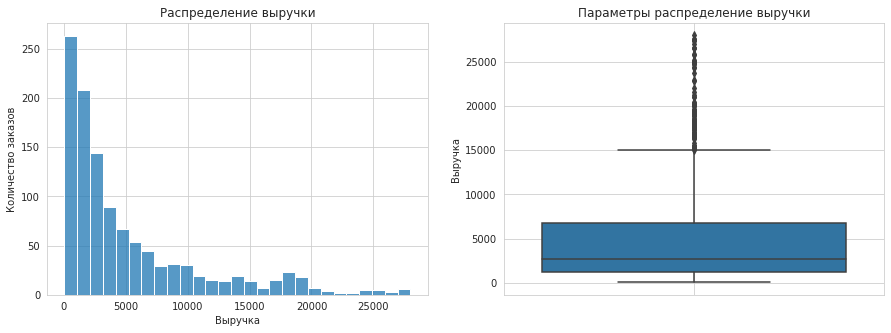

In [22]:
# графики распределения выручки
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# выведем распределение выручки
sns.histplot(data=orders_temp, x='revenue', ax=ax[0])
# настройки графика
ax[0].set_title("Распределение выручки")
ax[0].set_ylabel("Количество заказов")
ax[0].set_xlabel("Выручка")


 # визуальный анализ параметров распределение выручки
sns.boxplot(data=orders_temp, y='revenue',
            width=0.8, ax=ax[1])
# настройки графика
ax[1].set_title("Параметры распределение выручки")
ax[1].set_ylabel("Выручка")

# включаем сетку
plt.grid(True)

plt.show()

In [23]:
# получаем кол-во заказов и объем/среднее выручки по группам
# без учета 5% заказов
a_b_table = orders_temp.groupby(by='group', as_index=False).agg({
    'transaction_id':'count', 
    'visitor_id':'nunique', 
    'revenue':['sum', 'mean']}
                        )
a_b_table.columns = ['group', 'cnt_orders', 
                     'cnt_unique_visitors', 'sum_revenue', 
                     'mean_revenue']

# добавим отношение по кол-ву заказов
a_b_table['rel_cnt_orders'] = (a_b_table.cnt_orders/a_b_table.cnt_orders.sum()
                                           *100).round(2)

a_b_table

,group,cnt_orders,cnt_unique_visitors,sum_revenue,mean_revenue,rel_cnt_orders
0,A,531,479,2768216,5213.212806,46.7
1,B,606,557,3107971,5128.665017,53.3


Без учета 5%: показатели выручки "выровнялись" при небольшом изменении соотношении кол-ва заказов (разница в 6.6%, до удаления была 6.9%).

* 1197 'сырых' записей о заказах.
* Большая разница в значениях выручки с заказа, от 50 у.е. до 1.29 млн у.е., при среднем значении 8348 у.е. и медианном 2978 у.е.
* Кол-во заказов в группе В примерно на 6.9% больше, чем в группе А.
* Распределение имеет сильное левостороннее отклонение от нормальности, поэтому для анализа следует применять непараметрические методы.

##### Анализ распределения посетителей по дням

In [24]:
# суммарное кол-во посетителей по группам
temp = visitors.groupby('group', as_index=False)['visitors'].sum()

# добавим относительные значения
temp['relative'] = (temp.visitors/temp.visitors.sum()*100).round(2)

temp

,group,visitors,relative
0,A,18736,49.76
1,B,18916,50.24


Кол-во посетителей в группе В чуть выше, чем в группе А (около 0.5%). <br>
Визуализируем кол-во посетителей по дням

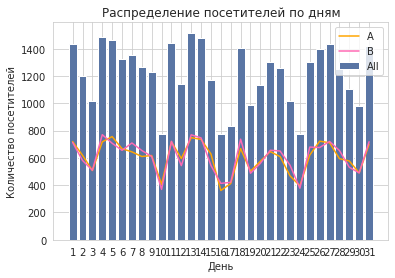

In [25]:
# визуализируем кол-во посетителей по дням
sns.set_style("whitegrid")
fig, ax = plt.subplots()

# рассчитываем суммарные кол-во посетителей
temp = visitors.groupby('date', as_index=False)['visitors'].sum()

# выведем распределение посетителей по дням
sns.barplot(data=temp, x=(temp['date'].dt.day), y='visitors',
                                     color='#4C72B0', label='All') 

# строим линейный график распределения для группы А
sns.lineplot(data=visitors[visitors['group']=='A'],
            x=(visitors['date'].dt.day-1),
            y='visitors', color='orange',
            label='A')

# строим линейный график распределения для группы B
sns.lineplot(data=visitors[visitors['group']=='B'],
            x=(visitors['date'].dt.day-1),
            y='visitors', color='#FF69B4',
            label='B')

# настройки графика
ax.set_title("Распределение посетителей по дням")
ax.set_ylabel("Количество посетителей")
ax.set_xlabel("День")

plt.grid(True) # включаем сетку
plt.legend() # включаем легенду

plt.show()

Распределение посетителей по дням равномерно-цикличное с уменьшением в выходные. <br>
Тенденция распределения сохраняется по группам.

##### Вывод по разделу

* Распределение выручки имеет сильное левостороннее отклонение от нормальности, поэтому для анализа следует применять непараметрические методы.
* Кол-во заказов на 6.9% выше в группе B, чем в группе A.
* Кол-ва посетителей в группе В чуть выше, чем в группе А (около 0.5%).
* Распределение посетителей по дням равномерно-цикличное с уменьшением в выходные. Тенденция распределения посетителей сохраняется по группам.

#### Анализ кумулятивных параметров

Создадим dataframe c кумулятивными данными по выручки, кол-ву заказов, количеству покупателей и кол-ва посетителей.

In [26]:
# создаем df с уникальными парами дата-группа заказов
datesGroups = orders[['date','group']].drop_duplicates()

# агрегируем значения по заказам
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
                            )].agg(
        {'date': 'max', # определяем дату кумуляции  
            'group': 'max', # сохраняем вывод группы
            'transaction_id': 'nunique', # кол-во уник. заказов на кум.дату
            'visitor_id': 'nunique', # кол-во уник. пользователь на кум.дату
            'revenue': 'sum'} # сумма выручки на кум.дату
                    ), axis=1).sort_values(by=['date', 'group']) # аггрегация по строкам

# агрегируем значения по посетителям
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
                            )].agg(
        {'date': 'max', # определяем дату кумуляции  
         'group': 'max', # сохраняем вывод группы
         'visitors': 'sum'} # сумма посетителей на кум.дату
                    ),axis=1,).sort_values(by=['date', 'group']) # аггрегация по строкам

# объединяем кумулятивные данные
cumulativeData = ordersAggregated.merge(
                    visitorsAggregated, 
                    left_on=['date', 'group'], 
                    right_on=['date', 'group'])

# переименовываем поля
cumulativeData.columns = ['date',
                    'group',
                    'orders',
                    'buyers',
                    'revenue',
                    'visitors']

cumulativeData.head(6)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803


In [27]:
# для удобства создаем логические маски
flag_a = (cumulativeData.group=='A')
flag_b = (cumulativeData.group=='B')

##### График кумулятивной выручки по группам

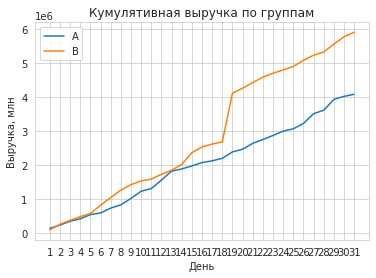

In [28]:
# отображаем график кумулятивной выручки по группам
sns.set_style("whitegrid")
fig, ax = plt.subplots()

# строим график выручки группы А
sns.lineplot(x=cumulativeData[flag_a]['date'].dt.day, 
             y=cumulativeData[flag_a]['revenue'], 
             label='A')

# строим график выручки группы B
sns.lineplot(x=cumulativeData[flag_b]['date'].dt.day, 
             y=cumulativeData[flag_b]['revenue'], 
             label='B')

# настройки графика
ax.set_title("Кумулятивная выручка по группам")
ax.set_ylabel("Выручка, млн")
ax.set_xlabel("День")
ax.set_xticks(cumulativeData['date'].dt.day.unique())  # отображение всех меток по x

plt.grid(True) # включаем сетку
plt.legend() 
plt.show()

**Вывод по кумулятивной выручки**
* На 15-й и 19-й день в группе B наблюдается резкий рост выручки, вызванные аномально крупными заказами ([подробнее об аномальных заказах](#Анализ-по-выручки)).
* Если не принимать во внимание аномальные заказы, выручка распределяется относительно равномерно. Незначительное превосходство группы B, вероятно, объясняется более высоким количеством заказов (на 6,9%).

##### График кумулятивного среднего чека по группам

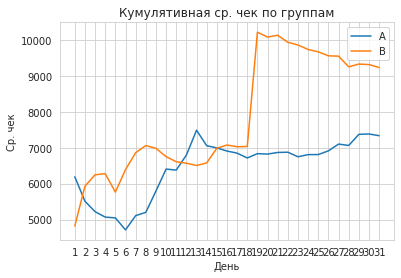

In [29]:
# отображаем график кумулятивного ср. чека по группам
sns.set_style("whitegrid")
fig, ax = plt.subplots()

# строим график группы А
sns.lineplot(x=cumulativeData[flag_a]['date'].dt.day, 
    y=(cumulativeData[flag_a]['revenue']/cumulativeData[flag_a]['orders']), 
             label='A')

# строим график группы B
sns.lineplot(x=cumulativeData[flag_b]['date'].dt.day, 
    y=(cumulativeData[flag_b]['revenue']/cumulativeData[flag_b]['orders']), 
             label='B')

# настройки графика
ax.set_title("Кумулятивная ср. чек по группам")
ax.set_ylabel("Ср. чек")
ax.set_xlabel("День")
ax.set_xticks(cumulativeData['date'].dt.day.unique())  # отображение всех меток по x

plt.grid(True) # включаем сетку
plt.legend() 
plt.show()

**Вывод по кумулятивному ср. чеку**
* Наблюдается аномально большой рост среднего чека в группе B на 19-й день, связанный с аномальным заказом.
* Показатель среднего чека по группе А установился в диапазоне от 7800 у.е. до 8500 у.е..
* Показатель среднего чека по группе B не установился. Возможно это связанно с аномальными заказами.

##### График относительного изменения кумул. ср. чеков

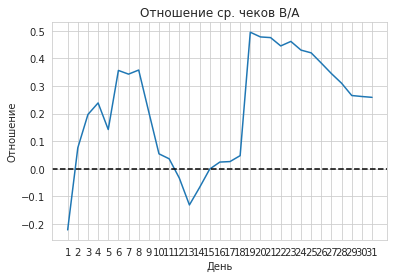

In [30]:
# отображаем график относительного изменения ср. чеков
sns.set_style("whitegrid")
fig, ax = plt.subplots()

# создаем Series с отношением (возможно т.к. у нас даты совпадают)
relationship_b_a = (
    (cumulativeData[flag_b]['revenue']/cumulativeData[flag_b]['orders']
                ).reset_index(drop=True) 
                    /
    (cumulativeData[flag_a]['revenue']/cumulativeData[flag_a]['orders']
                ).reset_index(drop=True)
                    )
                  
# строим график
sns.lineplot(x=cumulativeData['date'].dt.day.unique(),
    y=relationship_b_a-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

# настройки графика
ax.set_title("Отношение ср. чеков B/A")
ax.set_ylabel("Отношение")
ax.set_xlabel("День")
ax.set_xticks(cumulativeData['date'].dt.day.unique())  # отображение всех меток по x

plt.grid(True) # включаем сетку
plt.show()

**Вывод по отношения кумулятивных ср. чеков**
* Наблюдается резкое изменение в отношении кумулятивных средних чеков, что свидетельствует о существенном влиянии аномальных значений.

##### График кумулятивного ср. кол-ва заказов на посетителя по группам

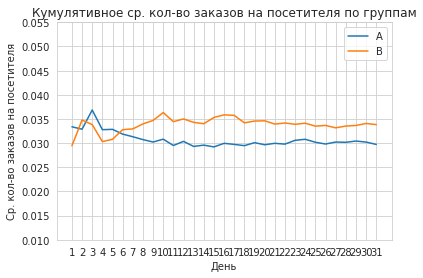

In [31]:
# отображаем график 
# кумулятивного ср. кол-ва заказов на посетителя по группам
sns.set_style("whitegrid")
fig, ax = plt.subplots()

# строим график группы А
sns.lineplot(x=cumulativeData[flag_a]['date'].dt.day, 
    y=(cumulativeData[flag_a]['orders']/cumulativeData[flag_a]['visitors']), 
             label='A')

# строим график группы B
sns.lineplot(x=cumulativeData[flag_b]['date'].dt.day, 
    y=(cumulativeData[flag_b]['orders']/cumulativeData[flag_b]['visitors']), 
             label='B')

# настройки графика
ax.set_title("Кумулятивное ср. кол-во заказов на посетителя по группам")
ax.set_ylabel("Ср. кол-во заказов на посетителя")
ax.set_xlabel("День")
ax.set_xticks(cumulativeData['date'].dt.day.unique())  # отображение всех меток по x
plt.yticks(np.arange(0.01, 0.06, 0.005)) # установка масштаба по оси Y

plt.grid(True) # включаем сетку
plt.legend() 
plt.show()

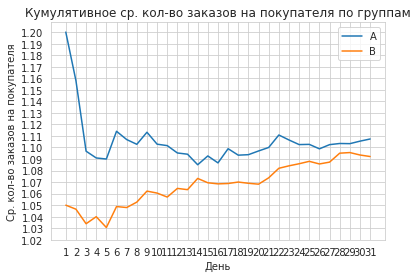

In [32]:
# отображаем график 
# кумулятивного ср. кол-ва заказов на покупателя по группам
sns.set_style("whitegrid")
fig, ax = plt.subplots()

# строим график группы А
sns.lineplot(x=cumulativeData[flag_a]['date'].dt.day, 
    y=(cumulativeData[flag_a]['orders']/cumulativeData[flag_a]['buyers']), 
             label='A')

# строим график группы B
sns.lineplot(x=cumulativeData[flag_b]['date'].dt.day, 
    y=(cumulativeData[flag_b]['orders']/cumulativeData[flag_b]['buyers']), 
             label='B')

# настройки графика
ax.set_title("Кумулятивное ср. кол-во заказов на покупателя по группам")
ax.set_ylabel("Ср. кол-во заказов на покупателя")
ax.set_xlabel("День")
ax.set_xticks(cumulativeData['date'].dt.day.unique())  # отображение всех меток по x
plt.yticks(np.arange(1.02, 1.21, 0.01)) # установка масштаба по оси Y

plt.grid(True) # включаем сетку
plt.legend() 
plt.show()

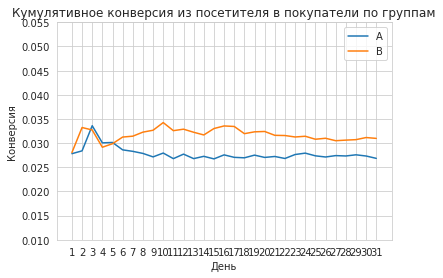

In [33]:
# отображаем график 
# кумулятивного конверсия посетитель/покупатель по группам
sns.set_style("whitegrid")
fig, ax = plt.subplots()

# строим график группы А
sns.lineplot(x=cumulativeData[flag_a]['date'].dt.day, 
    y=(cumulativeData[flag_a]['buyers']/cumulativeData[flag_a]['visitors']), 
             label='A')

# строим график группы B
sns.lineplot(x=cumulativeData[flag_b]['date'].dt.day, 
    y=(cumulativeData[flag_b]['buyers']/cumulativeData[flag_b]['visitors']), 
             label='B')

# настройки графика
ax.set_title("Кумулятивное конверсия из посетителя в покупатели по группам")
ax.set_ylabel("Конверсия")
ax.set_xlabel("День")
ax.set_xticks(cumulativeData['date'].dt.day.unique())  # отображение всех меток по x
plt.yticks(np.arange(0.01, 0.06, 0.005)) # установка масштаба по оси Y

plt.grid(True) # включаем сетку
plt.legend() 
plt.show()

**Вывод по кумул. ср. кол-ва заказов на посетителя/покупателя и конверсии посетителей в покупатели по группам**
* Кумулятивное ср. кол-во заказов на посетителя выше в группе B (≈0.5%).
* Кумулятивное ср. кол-во заказов на покупателя выше в группе A (≈0.5..2%). Составляет около 1.1 заказ на покупателя.
* Кумулятивная конверсия из посетителя в покупатели выше в группе B (≈0.5%).
* Группа B показывает лучшие показатели дневной конверсии.
* Группа А показывает лучшие показатели дневного кол-ва заказов.

##### График относительного изменения кумул. ср. кол-ва заказов на посетителя

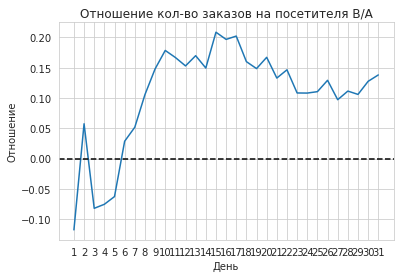

In [34]:
# отображаем график относительного изменения кол-во заказов/посетитель
sns.set_style("whitegrid")
fig, ax = plt.subplots()

# создаем Series с отношением (возможно т.к. у нас даты совпадают)
relationship_b_a = (
    (cumulativeData[flag_b]['orders']/cumulativeData[flag_b]['visitors']
                ).reset_index(drop=True) 
                    /
    (cumulativeData[flag_a]['orders']/cumulativeData[flag_a]['visitors']
                ).reset_index(drop=True)
                    )
                  
# строим график
sns.lineplot(x=cumulativeData['date'].dt.day.unique(),
    y=relationship_b_a-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

# настройки графика
ax.set_title("Отношение кол-во заказов на посетителя B/A")
ax.set_ylabel("Отношение")
ax.set_xlabel("День")
ax.set_xticks(cumulativeData['date'].dt.day.unique())  # отображение всех меток по x

plt.grid(True) # включаем сетку
plt.show()

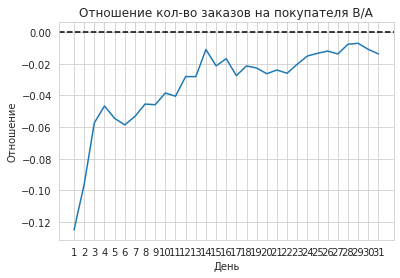

In [35]:
# отображаем график относительного изменения кол-во заказов/покупателям
sns.set_style("whitegrid")
fig, ax = plt.subplots()

# создаем Series с отношением (возможно т.к. у нас даты совпадают)
relationship_b_a = (
    (cumulativeData[flag_b]['orders']/cumulativeData[flag_b]['buyers']
                ).reset_index(drop=True) 
                    /
    (cumulativeData[flag_a]['orders']/cumulativeData[flag_a]['buyers']
                ).reset_index(drop=True)
                    )
                  
# строим график
sns.lineplot(x=cumulativeData['date'].dt.day.unique(),
    y=relationship_b_a-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

# настройки графика
ax.set_title("Отношение кол-во заказов на покупателя B/A")
ax.set_ylabel("Отношение")
ax.set_xlabel("День")
ax.set_xticks(cumulativeData['date'].dt.day.unique())  # отображение всех меток по x

plt.grid(True) # включаем сетку
plt.show()

**Вывод по относительным изменениям кол-во заказов к посетителям, кол-во заказов к покупателям**
* Кол-во заказов к посетителям стабильно выше у группы B. В группе B качественнее трафик, чем в группе А. Если клиент зашел на сайт, то вероятность совершить покупку в этот день выше, чем для группы А.
* Кол-во заказов к покупателям стабильно выше у группы A. В группе А один покупатель может в день оформить больше заказов, чем покупатель из группы B. Возможно связанно с неудобством оформления заказа или с хорошим предложением "рекомендуемых товаров".


#### Анализ выбросов

##### Анализ кол-ва заказов по пользователям

Создадим dataframe с количеством заказов по пользователям

In [36]:
# создаем df с кол-вом заказов по пользователям
orders_by_users = orders.groupby('visitor_id', as_index=False
                            ).agg({'transaction_id':'nunique'})

orders_by_users.columns = ['user_id', 'cnt_orders']

orders_by_users.sort_values('cnt_orders', ascending=False).head(5)

,user_id,cnt_orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Построим гистограмму и точечный график для оценки кол-во заказов у пользователей

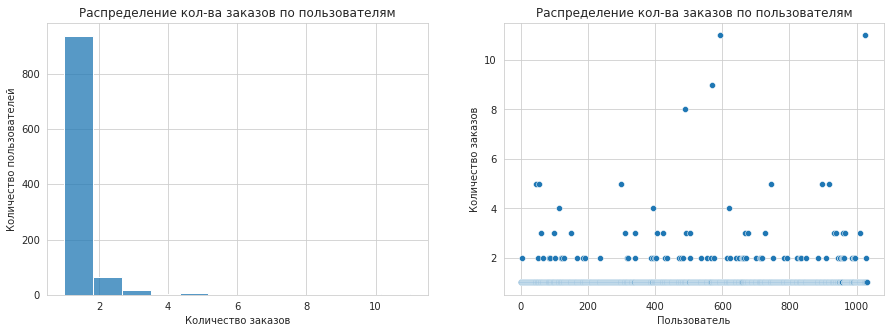

In [37]:
# графики распределения выручки
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# гистограмма
sns.histplot(data=orders_by_users, x='cnt_orders', ax=ax[0])
# настройки графика
ax[0].set_title("Распределение кол-ва заказов по пользователям")
ax[0].set_ylabel("Количество пользователей")
ax[0].set_xlabel("Количество заказов")


 # визуальный анализ параметров распределение выручки
sns.scatterplot(data=orders_by_users, 
            x=pd.Series(range(1,orders_by_users.user_id.count())),
            y='cnt_orders', ax=ax[1])
# настройки графика
ax[1].set_title("Распределение кол-ва заказов по пользователям")
ax[1].set_ylabel("Количество заказов")
ax[1].set_xlabel("Пользователь")

# включаем сетку
plt.grid(True)

plt.show()

Посчитаем 95-й и 99-й перцентиль количества заказов на пользователя. 

In [38]:
# выводим перцентили
print('95-й перцентиль: {0:.2f}'.format(np.percentile(orders_by_users['cnt_orders'], 95)))
print('99-й перцентиль: {0:.2f}'.format(np.percentile(orders_by_users['cnt_orders'], 99)))

95-й перцентиль: 2.00
99-й перцентиль: 4.00


**Вывод по количеству заказов на пользователя**
* Большинство пользователей совершают не более двух заказов.
* Заказы свыше трёх раз встречаются у пользователей достаточно редко.
* Более пяти заказов сделали только четыре пользователя.
* Аномальными были признаны пользователи с 4 и более заказами, т.е. 1% от всех пользователей. 

##### Анализ заказов по стоимости

Построим гистограмму и точечный график для оценки заказов по стоимости

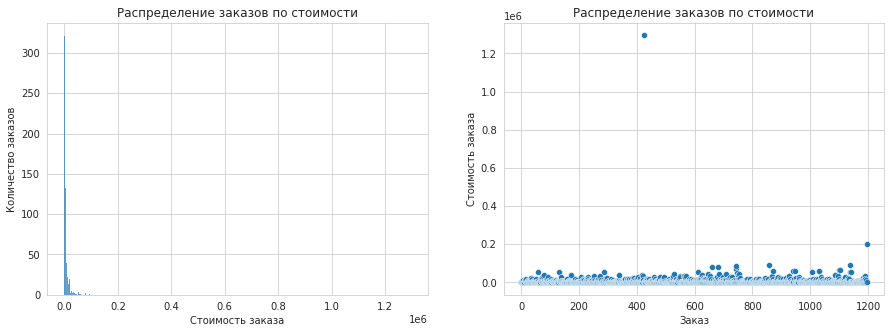

In [39]:
# графики распределения выручки
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# гистограмма
sns.histplot(data=orders, x='revenue', ax=ax[0])
# настройки графика
ax[0].set_title("Распределение заказов по стоимости")
ax[0].set_ylabel("Количество заказов")
ax[0].set_xlabel("Стоимость заказа")


 # визуальный анализ параметров распределение выручки
sns.scatterplot(data=orders, 
            x=pd.Series(range(0, orders.revenue.count())),
            y='revenue', ax=ax[1])
# настройки графика
ax[1].set_title("Распределение заказов по стоимости")
ax[1].set_ylabel("Стоимость заказа")
ax[1].set_xlabel("Заказ")

# включаем сетку
plt.grid(True)

plt.show()

Выведем эти графики со срезкой по аномальным данным (стоимостью свыше 100 т.у.е.). <br>
Гистограмма со срезкой в 5% [была предоставленна выше](#Анализ-по-выручки).

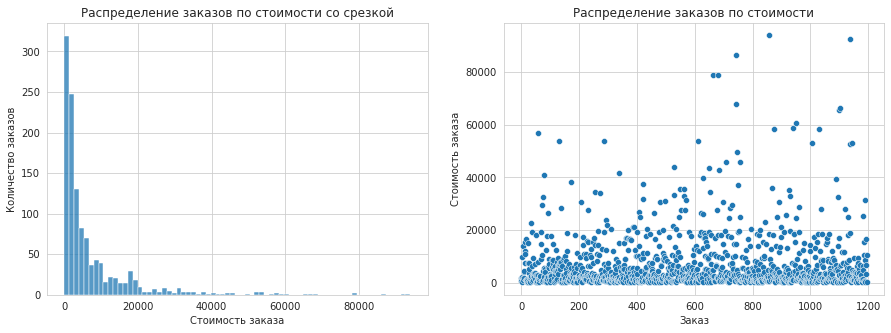

In [40]:
# графики распределения выручки со срезкой
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# гистограмма
sns.histplot(data=orders[orders['revenue']<100000], x='revenue', ax=ax[0])
# настройки графика
ax[0].set_title("Распределение заказов по стоимости со срезкой")
ax[0].set_ylabel("Количество заказов")
ax[0].set_xlabel("Стоимость заказа")


 # визуальный анализ параметров распределение выручки
sns.scatterplot(data=orders[orders['revenue']<100000], 
            x=pd.Series(range(0, orders.revenue.count())),
            y='revenue', ax=ax[1])
# настройки графика
ax[1].set_title("Распределение заказов по стоимости")
ax[1].set_ylabel("Стоимость заказа")
ax[1].set_xlabel("Заказ")

# включаем сетку
plt.grid(True)

plt.show()

Посчитаем 95-й и 99-й перцентиль стоимости заказов.

In [41]:
# выводим перцентили
print('95-й перцентиль: {0:.2f}'.format(np.percentile(orders['revenue'], 95)))
print('99-й перцентиль: {0:.2f}'.format(np.percentile(orders['revenue'], 99)))

95-й перцентиль: 28000.00
99-й перцентиль: 58233.20


**Вывод по стоимости заказов**
* Анализ аномалий по стоимости заказов произведен в [анализе количественных значений](#Анализ-по-выручки)
* Большинство заказов стоимостью до 18 т.у.е..
* Есть аномальные заказы в 200 т.у.е. и 1300 т.у.е.
* Аномальными были признаны заказы стоимостью свыше 28 т.у.е., т.е. 5% от всех заказов. 


#### Определение статистической значимости 

**Обобщенная гипотеза:** <br>
Нулевая гипотеза H<sub>0</sub> - cредние значения параметров в группах A и B равны (μ<sub>b</sub>=μ<sub>a</sub>). <br>
Альтернативная гипотеза H<sub>1</sub> - cредние значения параметров в группах A и B не равны (μ<sub>b</sub><>μ<sub>a</sub>).

Распределение параметров имеет сильное левостороннее отклонение от нормальности, поэтому для анализа следует применять непараметрические методы.

Создадим таблицу с указанием даты, кол-во заказов на дату, выручка на дату, кол-вом пользователей на дату с разбивкой по группам.

In [42]:
# создаем таблицу

# кол-во заказов и выручки на дату для группы A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
                )

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# кол-во заказов и выручки на дату для группы B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
                )

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# кол-во посетителей на дату для группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# кол-во посетителей на дату для группы B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

data = (
    ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        )

data.sample(5) # проверка

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB
13,2019-08-14,24,64341,23,171708,735,746
28,2019-08-29,22,320690,20,231130,577,531
24,2019-08-25,10,68634,14,102862,621,679
29,2019-08-30,11,86460,24,215233,490,490
10,2019-08-11,13,77585,13,53310,718,721


In [43]:
data.isna().sum() # проверка на пропуски

date                0
ordersPerDateA      0
revenuePerDateA     0
ordersPerDateB      0
revenuePerDateB     0
visitorsPerDateA    0
visitorsPerDateB    0
dtype: int64

##### Среднее кол-во заказов на посетителя между группами по сырым данным

Собирем данные по заказам на посетителя. Если посетитель не сделал заказа, то укажем 0.

In [44]:
# расчет кол-ва совершенных заказов для группа А
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False
                            ).agg({'transaction_id':'nunique'})

ordersByUsersA.columns = ['visitor_id', 'orders']

# расчет кол-ва совершенных заказов для группа B
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False
                            ).agg({'transaction_id':'nunique'})

ordersByUsersB.columns = ['visitor_id', 'orders']


# добавляем 0 для всех посетителей группа А, которые не сделали заказ
# к объему покупателей/заказов доваляем 0 для посетителей без заказа (количественно)
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, 
        index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders')], # получаем Series с 0 размером: "посетители группы минус покупатели группы"  
    axis=0)

# добавляем 0 для всех посетителей группа B, которые не сделали заказ
# к объему покупателей/заказов доваляем 0 для посетителей без заказа (количественно)
sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, 
        index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
               name='orders')], # получаем Series с 0 размером: "посетители группы минус покупатели группы"  
    axis=0)

# проверка получившихся Series
display(sampleA.sample(5))
display(sampleB.sample(5))

4408     0
471      1
4603     0
16723    0
8356     0
Name: orders, dtype: int64

8835     0
1876     0
8701     0
10735    0
16344    0
Name: orders, dtype: int64

**Проверим гипотезу <br>**
Нулевая гипотеза H<sub>0</sub> - cредние кол-во заказов на посетителя в группах A и B равны (μ<sub>b</sub>=μ<sub>a</sub>). <br>
Альтернативная гипотеза H<sub>1</sub> - cредние кол-во заказов на посетителя в группах A и B не равны (μ<sub>b</sub><>μ<sub>a</sub>).
<br><br>
Уровень статистической значимости принимаем за 0.05. <br>
Из-за левосторонней асимметрии распределения используем непараметрический тест Манна-Уитни.

In [45]:
# двухсторонний тест Манна-Уитни 
alpha = 0.05 # задаем уровень статистической значимости

# проведение теста
results = st.mannwhitneyu(sampleA, 
                            sampleB)

print("Проверка различий в среднем кол-ве заказов по сырым данным:")
print(f"p-value (тест Манна-Уитни): {results.pvalue:.4f}")

if results.pvalue < alpha: # сравните p-значение с заданным уровнем значимости alpha
    print("Отвергаем нулевую гипотезу.",
          "Есть статистически значимые различия в среднем количестве заказов.")
else:
    print("Не удалось отвергнуть нулевую гипотезу.", 
          "Статистически значимых различий не обнаружено")

Проверка различий в среднем кол-ве заказов по сырым данным:
p-value (тест Манна-Уитни): 0.0168
Отвергаем нулевую гипотезу. Есть статистически значимые различия в среднем количестве заказов.


In [46]:
# выведем различие по среднему кол-ву заказов на посетителя
print(f"{sampleB.mean() / sampleA.mean() - 1:.3f}")

0.138


**Вывод по подразделу:** <br>
**По "сырым" данным** обнаружены статистические различия в среднем количестве заказов на посетителя между группами. <br>
Показатель группы B превышает результат группы А на 13,8%.

##### Средний чек между группами  по сырым данным

**Проверим гипотезу <br>**
Нулевая гипотеза H<sub>0</sub> - cредние чеки в группах A и B равны (μ<sub>b</sub>=μ<sub>a</sub>). <br>
Альтернативная гипотеза H<sub>1</sub> - средние чеки в группах A и B не равны (μ<sub>b</sub><>μ<sub>a</sub>).
<br><br>
Уровень статистической значимости принимаем за 0.05. <br>
Из-за левосторонней асимметрии распределения используем непараметрический тест Манна-Уитни.

In [47]:
# двухсторонний тест Манна-Уитни 
alpha = 0.05 # задаем уровень статистической значимости

# данные
receiptsA = orders[orders['group']=='A']['revenue']
receiptsB = orders[orders['group']=='B']['revenue']

# проведение теста
results = st.mannwhitneyu(receiptsA, 
                          receiptsB)

print("Проверка различий по среднему чеку по сырым данным:")
print(f"p-value (тест Манна-Уитни): {results.pvalue:.4f}")

if results.pvalue < alpha: # сравните p-значение с заданным уровнем значимости alpha
    print("Отвергаем нулевую гипотезу.",
          "Есть статистически значимые различия в среднем чеке.")
else:
    print("Не удалось отвергнуть нулевую гипотезу.", 
          "Статистически значимых различий не обнаружено")

Проверка различий по среднему чеку по сырым данным:
p-value (тест Манна-Уитни): 0.7293
Не удалось отвергнуть нулевую гипотезу. Статистически значимых различий не обнаружено


In [48]:
# выведем различие по среднему чеку
print(f"{receiptsB.mean() / receiptsA.mean() - 1:.3f}")

0.259


**Вывод по подразделу:** <br>
**По "сырым" данным** не обнаружены статистические различия по среднему чеку между группами. <br>
При этом показатель группы B превышает результат группы А на 25,9%. Это может быть связанно с выбросами.

##### Среднее кол-во заказов на посетителя между группами по очищенным данным

Выделим аномальных пользователей, которые совершили большое количество заказов и/или сделали заказ с аномально большим чеком. <br>
[Пользователи считаются аномальными по количеству заказов, если совершили >=4 заказов (99-й перцентиль)](#Анализ-кол-ва-заказов-по-пользователям). <br>
[Аномально высокими считаются заказы >28 т.у.е. (95-й перцентиль)](#Анализ-заказов-по-стоимости). <br>

In [49]:
# определяем аномальных пользователей

# аномальные пользователи по заказам
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] >= 4]['visitor_id'],
     ordersByUsersB[ordersByUsersB['orders'] >= 4]['visitor_id'], ],
    axis=0)

# аномальные пользователи по чеку
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']

# объединяем аномальных пользователей по двум критериям
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
                )

print(abnormalUsers.sample(5))
print(f"Кол-во аномальных пользователей: {abnormalUsers.shape[0]}")

744     888512513
481    3177790019
287    2254456485
563     935349363
723    4009017467
Name: visitor_id, dtype: int64
Кол-во аномальных пользователей: 63


Выделено 63 аномальных пользователя. <br>
Определим статистическую значимость без учета аномальных пользователей. [Критерии определения без изменений](#Среднее-кол-во-заказов-на-посетителя-между-группами-по-сырым-данным).

In [50]:
# без учета аномальных пользователей

# добавляем 0 для всех посетителей группа А, которые не сделали заказ
# к объему покупателей/заказов доваляем 0 для посетителей без заказа (количественно)
sampleA_clean = pd.concat(
    [ordersByUsersA[
        ~(ordersByUsersA['visitor_id'].isin(abnormalUsers))
                    ]['orders'],
     pd.Series(0, 
        index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders')], # получаем Series с 0 размером: "посетители группы минус покупатели группы"  
    axis=0)

# добавляем 0 для всех посетителей группа B, которые не сделали заказ
# к объему покупателей/заказов доваляем 0 для посетителей без заказа (количественно)
sampleB_clean = pd.concat(
    [ordersByUsersB[
        ~(ordersByUsersB['visitor_id'].isin(abnormalUsers))
                    ]['orders'],
     pd.Series(0, 
        index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
               name='orders')], # получаем Series с 0 размером: "посетители группы минус покупатели группы"  
    axis=0)

# проверка получившихся Series
display(sampleA_clean.sample(5))
display(sampleB_clean.sample(5))

168      1
3484     0
10252    0
13025    0
17032    0
Name: orders, dtype: int64

795      0
11611    0
5500     0
15480    0
16390    0
Name: orders, dtype: int64

**Проверим гипотезу <br>**
Нулевая гипотеза H<sub>0</sub> - cредние кол-во заказов на посетителя в группах A и B равны (μ<sub>b</sub>=μ<sub>a</sub>). <br>
Альтернативная гипотеза H<sub>1</sub> - cредние кол-во заказов на посетителя в группах A и B не равны (μ<sub>b</sub><>μ<sub>a</sub>).
<br><br>
Уровень статистической значимости принимаем за 0.05. <br>
Из-за левосторонней асимметрии распределения используем непараметрический тест Манна-Уитни.

In [51]:
# без учета аномальных пользователей

# двухсторонний тест Манна-Уитни 
alpha = 0.05 # задаем уровень статистической значимости

# проведение теста
results = st.mannwhitneyu(sampleA_clean, 
                            sampleB_clean)

print("Проверка различий в среднем кол-ве заказов по очищенным данным:")
print(f"p-value (тест Манна-Уитни): {results.pvalue:.4f}")

if results.pvalue < alpha: # сравните p-значение с заданным уровнем значимости alpha
    print("Отвергаем нулевую гипотезу.",
          "Есть статистически значимые различия в среднем количестве заказов.")
else:
    print("Не удалось отвергнуть нулевую гипотезу.", 
          "Статистически значимых различий не обнаружено")

Проверка различий в среднем кол-ве заказов по очищенным данным:
p-value (тест Манна-Уитни): 0.0179
Отвергаем нулевую гипотезу. Есть статистически значимые различия в среднем количестве заказов.


In [52]:
# выведем различие по среднему кол-ву заказов на посетителя
print(f"{sampleB_clean.mean() / sampleA_clean.mean() - 1:.3f}")

0.148


**Вывод по подразделу:** <br>
**По "очищенным" данным** обнаружены статистические различия в среднем количестве заказов на посетителя между группами. <br>
Показатель группы B превышает результат группы А на 14,8%.

##### Средний чек между группами  по очищенным данным

[Аномальных пользователей определили в разделе выше](#Среднее-кол-во-заказов-на-посетителя-между-группами-по-очищенным-данным).
Определим статистическую значимость без учета аномальных пользователей. [Критерии определения без изменений](#Средний-чек-между-группами--по-сырым-данным).

**Проверим гипотезу <br>**
Нулевая гипотеза H<sub>0</sub> - cредние чеки в группах A и B равны (μ<sub>b</sub>=μ<sub>a</sub>). <br>
Альтернативная гипотеза H<sub>1</sub> - средние чеки в группах A и B не равны (μ<sub>b</sub><>μ<sub>a</sub>).
<br><br>
Уровень статистической значимости принимаем за 0.05. <br>
Из-за левосторонней асимметрии распределения используем непараметрический тест Манна-Уитни.

In [53]:
# без учета аномальных пользователей

# двухсторонний тест Манна-Уитни 
alpha = 0.05 # задаем уровень статистической значимости

# данные
receiptsA_clean = orders[(~(orders['visitor_id'].isin(abnormalUsers)))
                         & (orders['group']=='A')]['revenue']
receiptsB_clean = orders[(~(orders['visitor_id'].isin(abnormalUsers)))
                         & (orders['group']=='B')]['revenue']

# проведение теста
results = st.mannwhitneyu(receiptsA_clean, 
                          receiptsB_clean)

print("Проверка различий по среднему чеку по очищенным данным:")
print(f"p-value (тест Манна-Уитни): {results.pvalue:.4f}")

if results.pvalue < alpha: # сравните p-значение с заданным уровнем значимости alpha
    print("Отвергаем нулевую гипотезу.",
          "Есть статистически значимые различия в среднем чеке.")
else:
    print("Не удалось отвергнуть нулевую гипотезу.", 
          "Статистически значимых различий не обнаружено")

Проверка различий по среднему чеку по очищенным данным:
p-value (тест Манна-Уитни): 0.9765
Не удалось отвергнуть нулевую гипотезу. Статистически значимых различий не обнаружено


In [54]:
# выведем различие по среднему чеку
print(f"{receiptsB_clean.mean() / receiptsA_clean.mean() - 1:.3f}")

-0.017


**Вывод по подразделу:** <br>
**По "очищенным" данным** не обнаружены статистические различия по среднему чеку между группами. <br>
Показатель группы А превышает результат группы B на 1,7%. 

##### Вывод по разделу

* Есть статистически значимое различие по среднему количеству заказов между группами как по "сырым" (13,8% в сторону группы B) так и по "очищенным" (14,8% в сторону группы B) данным после фильтрации аномалий.
* Нет статистически значимого различия по среднему чеку между группами ни по "сырым" (25,9% в сторону группы B), ни по "очищенным" (1,7% в сторону группы A) данным после фильтрации аномалий. 

### Вывод по анализу A/B-теста

* Количество посетителей в группе В чуть выше, чем в группе А (около 0.5%)
* Количество заказов в группе В примерно на 6.9% больше, чем в группе А.
* В результате тестирования было обнаружено повышение конверсии посетителей в покупателей для группы B.
* В результате тестирования небыло обнаружено изменения среднего чека между группами.
* График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и установился на стабильном значении.
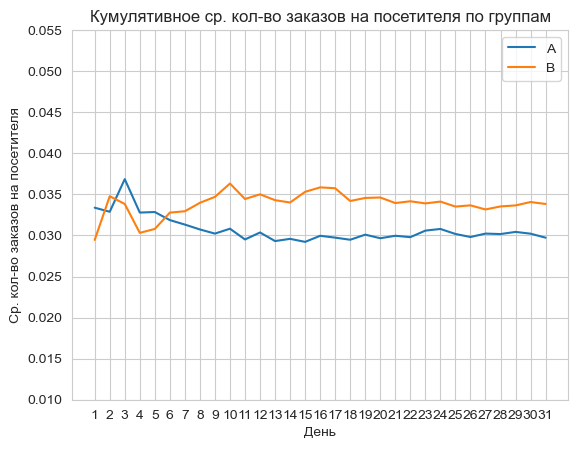
* График различия среднего чека говорит о том, что результаты группы B обусловленны аномальными значениями на 15 и 19 день. Сделать из этого графика определённые выводы нельзя.
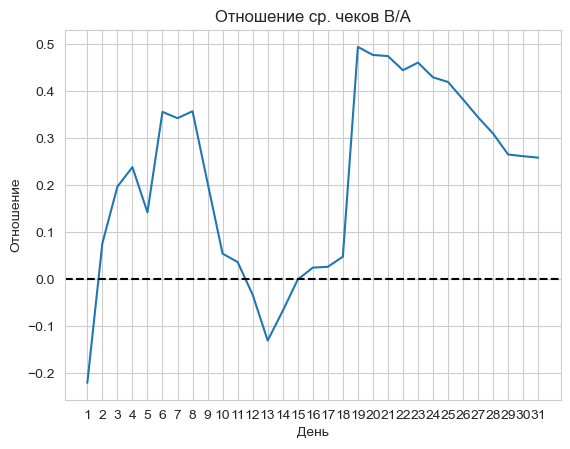

**Решение по результатам теста:** <br>
Тест признать состоявшимся. Зафиксировать увеличение конверсии для группы B и отсутствие различий по средним чекам. <br>
Тест можно остановить, увеличение данных с очень малой вероятностью повлияет на результат.